In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/75-pix/images.npy
/kaggle/input/75-pix/labels.npy


In [2]:

import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.initializers import HeUniform, GlorotUniform
import pandas as pd





images = np.load("/kaggle/input/75-pix/images.npy")
labels = np.load("/kaggle/input/75-pix/labels.npy")



In [3]:
## Check the head times available

unique_heads = {t[0] for t in labels}
print(unique_heads)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [4]:
#Starting with classification


class Dataset_prep():
    def __init__(self, X_train,X_valid, y_train, y_valid, input_shape)-> None:
        self.input_shape = input_shape
        self.X_train = X_train
        self.X_valid = X_valid
        self.y_train = y_train
        self.y_valid = y_valid
        
        
# Define the function to map (hour, minute) tuples to categories
def time_to_category(time_tuple):
    hour, minute = time_tuple
    # Determine the category based on the minute
    if minute < 30:
        category = hour * 2  # First half-hour of the hour
    else:
        category = hour * 2 + 1  # Second half-hour of the hour

    # Return the category in range [0, 23]
    return category % 24

img_rows, img_cols = 75, 75  #pixel size

# Example usage
list_of_times = labels
categories = [time_to_category(time) for time in list_of_times]
classes = list(set(categories))  #classes 
new_labels = np.array(categories)


X_train, X_test,y_train,  y_test = train_test_split(images, new_labels, test_size=0.10, random_state=42) 

split_index = int(0.2 * len(X_train))  # 20% of the data
X_train = X_train.astype('float32')

X_valid = X_train[:split_index]/255.0
X_train = X_train[split_index:]/255.0

y_valid = y_train[:split_index]
y_train = y_train[split_index:]



# lets start the initilization for layer, come on!

batch_size = 64
num_classes = len(classes)
epochs = 12

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_valid = X_valid.reshape(X_valid.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    
print(X_train.shape)
print(X_valid.shape)
 

dataset_p = Dataset_prep(X_train,X_valid, y_train, y_valid, input_shape)
    

(12960, 75, 75, 1)
(3240, 75, 75, 1)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_86 (Conv2D)              │ (None, 75, 75, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 75, 75, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 73, 73, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 36, 36, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 768,856 (2.93 MB)

 Trainable params: 768,856 (2.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/steptep - accuracy: 0.0428 - loss: 2.66
Epoch 1 predictions: [[0.04164672 0.04192297 0.04150421 0.04166067 0.04168739 0.0418463
  0.04193288 0.04164906 0.04152331 0.04182954 0.04157456 0.04182544
  0.04144462 0.04150149 0.0412989  0.04161873 0.04176203 0.04163726
  0.04192224 0.04163391 0.04142443 0.0417264  0.04166217 0.04176484]
 [0.04171896 0.04195766 0.04154402 0.04161384 0.0416283  0.04185062
  0.04187029 0.04166373 0.04153951 0.04182041 0.04155956 0.04178909
  0.04147268 0.04145801 0.04137734 0.04162175 0.04170667 0.04174981
  0.0418563  0.04155612 0.04150931 0.04175745 0.04164362 0.04173492]
 [0.04172199 0.04200284 0.0415369  0.0416835  0.04162243 0.04185477
  0.04193833 0.04162925 0.04153319 0.04182272 0.04161433 0.04181443
  0.0414494  0.04147638 0.04132612 0.04155011 0.04173874 0.04171364
  0.04185979 0.04152934 0.04150602 0.04171183 0.04164872 0.04171514]
 [0.04160837 0.04189649 0.04148024 0.04165839 0.04170257 0.04188145
  0.041

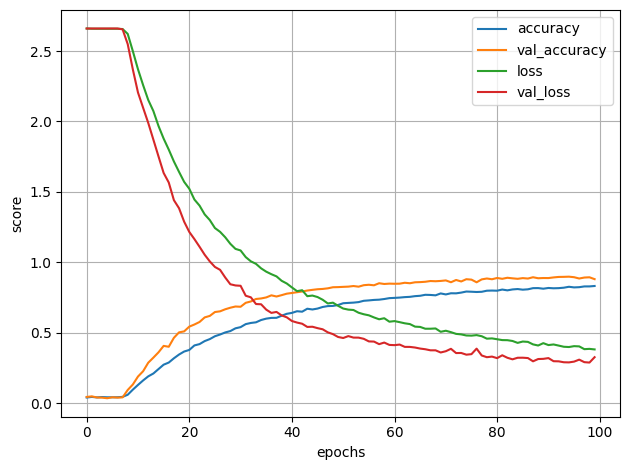

In [24]:
import tensorflow as tf

from tensorflow.keras.layers import BatchNormalization

def circular_loss(y_true, y_pred, num_classes=24):
    ce_loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
    
    # Circular loss component for temporal/cyclic structure
    theta_true = 2 * np.pi * tf.cast(y_true, tf.float32) / num_classes
    class_indices = tf.range(num_classes, dtype=tf.float32)
    theta_pred = 2 * np.pi * tf.reduce_sum(class_indices * y_pred, axis=-1) / num_classes
    cos_similarity = tf.cos(theta_true - theta_pred)
    circular_loss = 1 - cos_similarity
    
    # Calculate mean values to get the relative scale of each loss component
    ce_loss_mean = tf.reduce_mean(ce_loss)
    circular_loss_mean = tf.reduce_mean(circular_loss)
    total_mean = ce_loss_mean + circular_loss_mean

    # Use tf.cond to handle the alpha calculation dynamically within the graph
    alpha = tf.cond(total_mean > 0, 
                    lambda: ce_loss_mean / total_mean,  # Proportional weight for ce_loss
                    lambda: 0.5)  # Fallback value if total_mean is zero
    
    # Combine the two losses with dynamically calculated alpha
    combined_loss = alpha * ce_loss + (1 - alpha) * circular_loss
    return combined_loss




def build_model(input_shape):
    num_classes = 24
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape, padding = "same", kernel_initializer=GlorotUniform()))
    BatchNormalization(),
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu', padding = "same", kernel_initializer=GlorotUniform()))
    BatchNormalization(),
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeUniform()))
    BatchNormalization(),
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Dropout(0.25))
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu', padding = "same", kernel_initializer=GlorotUniform()))
    BatchNormalization(),
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeUniform()))
    BatchNormalization(),
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeUniform()))
    BatchNormalization(),
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=GlorotUniform()))
    BatchNormalization(),
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu',kernel_initializer=GlorotUniform()))
    BatchNormalization(),
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax',kernel_initializer=GlorotUniform()))
    BatchNormalization(),
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=lambda y_true, y_pred: circular_loss(y_true, y_pred, num_classes=num_classes),
        #loss="sparse_categorical_crossentropy",
        metrics=['accuracy']
    )

    return model


def train_model(model):
    validation_sample = (X_valid[:5], y_valid[:5])  # Use first 5 samples for demonstration
    

    # history = model.fit(X_train, y_train,
    #           batch_size=batch_size,
    #           epochs=epochs,
    #           verbose=1,
    #           validation_data=(X_valid, y_valid))




    checkpoint_cb = keras.callbacks.ModelCheckpoint(
        "classifier_model.keras", save_best_only=True
    )
    early_stopping_cb = keras.callbacks.EarlyStopping(
        patience=10, restore_best_weights=True
    )
    history = model.fit(X_train, y_train, batch_size = batch_size, epochs=100,validation_data = (X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb, DisplayPredictionsCallback(validation_sample)])
    
    data_history = pd.DataFrame(history.history)

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('epochs')
    plt.ylabel('score')
    plt.legend(loc="best")


    plt.grid(True)
    plt.tight_layout()
    plt.show()
    data_history.to_csv("train report.csv")
    return data_history

model = build_model(input_shape= input_shape)
model.summary()


history = train_model(model)

